In [1]:
import helpful_functions as hf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, losses
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
#----- the autoencoder is for 64 pixel image -----#
# load saved encoder and decoder
encoder = keras.models.load_model("saved_model/encoder_(10x10x16)_64pix")
decoder = keras.models.load_model("saved_model/decoder_(10x10x16)_64pix")

# build autoencoder with loop
autoencoder_input1 = keras.Input(shape=(64, 64, 1), name="input_img1")
autoencoder_input2 = keras.Input(shape=(64, 64, 1), name="input_img2")

encoded_img1 = encoder(autoencoder_input1)
encoded_img2 = encoder(autoencoder_input2)
encoded_img3 = layers.add((encoded_img1, encoded_img2))
decoded_img = decoder(encoded_img3)

autoencoder = keras.Model(inputs=[autoencoder_input1, autoencoder_input2],
                          outputs=decoded_img, name="autoencoder")
autoencoder.summary()



Model: "autoencoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img1 (InputLayer)        [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 input_img2 (InputLayer)        [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 encoder (Functional)           (None, 10, 10, 16)   17488       ['input_img1[0][0]',             
                                                                  'input_img2[0][0]']             
                                                                                                  
 add (Add)                      (None, 10, 10, 16)   0           ['encoder[0][0]',      

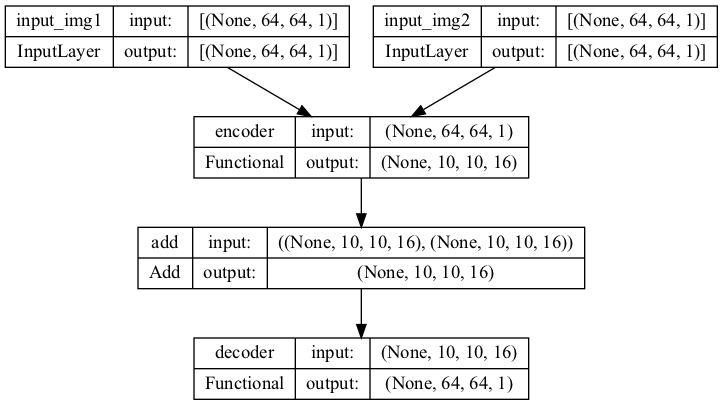

In [3]:
keras.utils.plot_model(autoencoder, "loop_64.png", show_shapes=True)

# load data_set
data_set = hf.load_dataset_npz('data_set/random_img_5_14_64pix_3ob.npz')

x_test0 = np.zeros((1,2,64,64,1))
x_test0[0] = data_set[36,0:2]
x_test = data_set[0:3,0]
x_test = np.expand_dims(x_test, axis=1)

print(data_set.shape)
print(np.shape(x_test0),"first dimension is image number")
print(np.shape(x_test), "first dimension is sample number")
print(np.shape(x_test0[:,0]))


In [2]:
# load data_set
data_set = hf.load_dataset_npz('data_set/loop_test_10images_(5-15).npz')
samples = data_set
x_test0 = samples[:, 0:2]
#x_test0 = np.expand_dims(x_test0, axis=0)
x_test = samples[:, 2:]
#x_test = np.expand_dims(x_test,axis=1)
print(f"data_set shape is {data_set.shape}")
print(f"samples shape is {np.shape(samples)}")
print(f"x_test0 shape is {np.shape(x_test0)}")
print(f"x_test shape is {np.shape(x_test)}")

data_set shape is (10, 5, 64, 64, 1)
samples shape is (10, 5, 64, 64, 1)
x_test0 shape is (10, 2, 64, 64, 1)
x_test shape is (10, 3, 64, 64, 1)


In [5]:
loops = 1
# initial
output = autoencoder([x_test0[:,0], x_test0[:,1]])
print(np.shape(output))
# loop
for i in range(loops):
    output = autoencoder([x_test[:, i],output])

(10, 64, 64, 1)


# make predictions
predictions = autoencoder.predict(data_set[0:4,0])

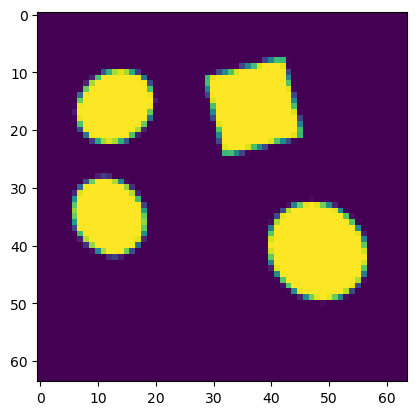

In [6]:
sample_num = 1
orig = np.add(x_test0[sample_num-1,0],x_test0[sample_num-1,1])
for i in range(loops):
   orig = np.add(orig, x_test[sample_num-1,i])
plt.imshow(orig)

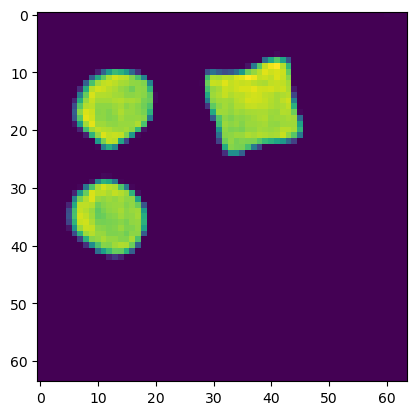

In [7]:
plt.imshow(output[sample_num-1])

predictions = autoencoder.predict([x_test0[:,0], x_test0[:,1]])

In [8]:
autoencoder = keras.models.load_model("saved_model/2Inputs_(10x10x16)_64pix")
predictions = autoencoder.predict([x_test0[:,0], x_test0[:,1]])
print(np.shape(predictions))
for j in range(loops):
    predictions = autoencoder.predict([x_test[:,j], predictions])

1/1 [==============================] - 0s 200ms/step
(3, 10, 64, 64, 1)


ValueError: in user code:

    File "/Users/mengze/miniforge3/envs/TFC/lib/python3.8/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Users/mengze/miniforge3/envs/TFC/lib/python3.8/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/mengze/miniforge3/envs/TFC/lib/python3.8/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/mengze/miniforge3/envs/TFC/lib/python3.8/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Users/mengze/miniforge3/envs/TFC/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/mengze/miniforge3/envs/TFC/lib/python3.8/site-packages/keras/engine/input_spec.py", line 216, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "autoencoder" expects 2 input(s), but it received 4 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 64, 64, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 64, 64, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 64, 64, 1) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 64, 64, 1) dtype=float32>]


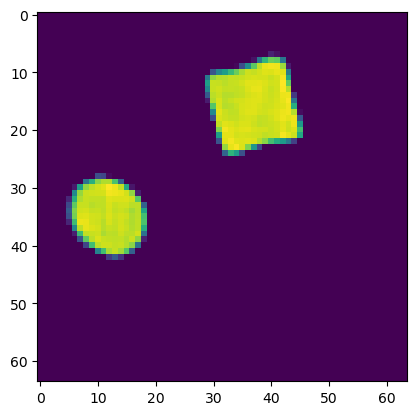

In [13]:
plt.imshow(predictions[2][0])